In [1]:
import pandas as pd

In [2]:
ok_cupid_data = pd.read_parquet('../Data/JSE_OkCupid/okcupid_profiles.parquet')

In [3]:
ok_cupid_data.body_type.unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', None,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

One Hot Encoding

In [4]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(
    sparse_output=False,
    drop='first'
)

In [5]:
z = ohe.fit_transform(ok_cupid_data[['body_type']])

In [6]:
pd.DataFrame(z, columns=ohe.get_feature_names_out())

,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up,body_type_None
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59942,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59943,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59944,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dummy Encoding

In [7]:
pd.get_dummies(
    ok_cupid_data.body_type,
    drop_first=True,
    dummy_na=True
)

,athletic,average,curvy,fit,full figured,jacked,overweight,rather not say,skinny,thin,used up,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
59941,False,False,False,False,False,False,False,False,False,False,False,True
59942,False,False,False,True,False,False,False,False,False,False,False,False
59943,False,True,False,False,False,False,False,False,False,False,False,False
59944,True,False,False,False,False,False,False,False,False,False,False,False


Problems with categorical variables

In [8]:
len(ok_cupid_data.location.unique())

199

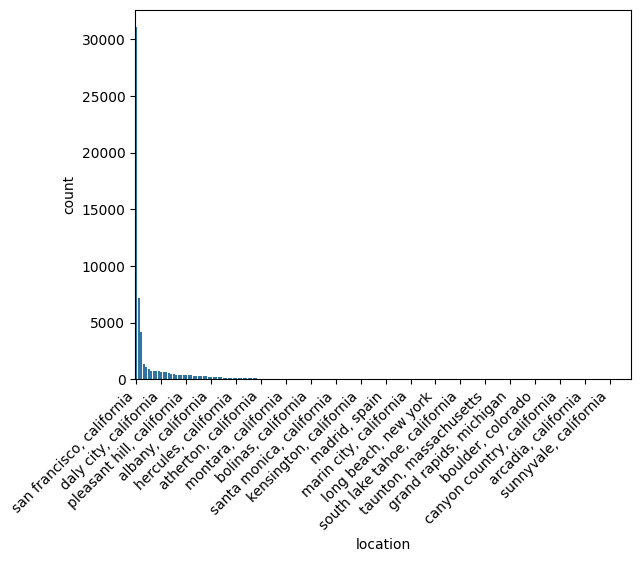

In [9]:
from seaborn import countplot
import matplotlib.pyplot as plt
chart = countplot(
    ok_cupid_data,
    x = 'location',
    order = ok_cupid_data['location'].value_counts().index
)
new_ticks = [i.get_text() for i in chart.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
None

In [10]:
z = ohe.fit_transform(ok_cupid_data[['location']])
encoded_location = pd.DataFrame(z, columns=ohe.get_feature_names_out())



In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(encoded_location)

In [12]:
counts = X_train.sum(axis=0)
counts[counts == 0]

location_arcadia, california            0.0
location_astoria, new york              0.0
location_boulder, colorado              0.0
location_cambridge, massachusetts       0.0
location_concord, california            0.0
location_cork, ireland                  0.0
location_denver, colorado               0.0
location_fort lauderdale, florida       0.0
location_glencove, california           0.0
location_kula, hawaii                   0.0
location_livingston, california         0.0
location_london, united kingdom         0.0
location_long beach, california         0.0
location_magalia, california            0.0
location_milpitas, california           0.0
location_murfreesboro, tennessee        0.0
location_oakley, california             0.0
location_pacheco, california            0.0
location_port costa, california         0.0
location_san luis obispo, california    0.0
location_santa clara, california        0.0
location_sunnyvale, california          0.0
location_taunton, massachusetts 

Feature Hashing

In [13]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=8, input_type="string")
raw_X = [["dog"], ["snake"], ["cat"]]
f = h.transform(raw_X)
f.toarray()


array([[ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [14]:

h = FeatureHasher(
    n_features=16,
    input_type='string'
)

In [15]:
column_values = ok_cupid_data['location'].unique()

In [16]:
values = [[x] for x in column_values]

In [17]:
values[0][0]

'south san francisco, california'

In [18]:
f = h.transform(values)
f.toarray().shape

(199, 16)

In [19]:
f.toarray()

array([[ 0.,  0.,  0., ...,  0., -1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

Bin Counting

In [20]:
avazu_train_data = pd.read_parquet('../Data/avazu-ctr-prediction/bin_counting.parquet')

In [21]:
avazu_train_data

,device_id,click
0,a99f214a,0
1,a99f214a,0
2,a99f214a,0
3,a99f214a,0
4,a99f214a,0
...,...,...
40428962,a99f214a,1
40428963,a99f214a,0
40428964,a99f214a,0
40428965,454877d9,1


In [33]:
len(avazu_train_data['device_id'].unique())

2686408

In [34]:
avazu_train_data.columns

Index(['device_id', 'click'], dtype='object')

In [35]:
avazu_bin_counts = avazu_train_data[['device_id', 'click']].groupby('device_id').agg(
    ['sum', 'count']
)

In [36]:
avazu_bin_counts[('click', 'no_click')] = avazu_bin_counts[('click', 'count')] - avazu_bin_counts[('click', 'sum')]

In [37]:
avazu_bin_counts.sort_values(by=('click', 'count'), ascending=False)

click                    
               sum     count  no_click
device_id                             
a99f214a   5809415  33358308  27548893
0f7c61dc     16190     21356      5166
c357dbff     12469     19667      7198
936e92fb       875     13712     12837
afeffc18      2211      9654      7443
...            ...       ...       ...
68bbabc1         1         1         0
68bba182         0         1         1
68bb8f54         0         1         1
68bb8a70         1         1         0
ffffe5da         0         1         1

[2686408 rows x 3 columns]

In [38]:
avazu_bin_counts[('click', 'N+')] = (
    avazu_bin_counts[('click', 'sum')] / avazu_bin_counts[('click', 'count')]
)
avazu_bin_counts[('click', 'N-')] = (
    avazu_bin_counts[('click', 'no_click')] / avazu_bin_counts[('click', 'count')]
)

In [39]:
avazu_bin_counts[('click', 'odds_ratio')] = (
    avazu_bin_counts[('click', 'N+')] ) / (
    avazu_bin_counts[('click', 'N-')]
)

In [40]:
avazu_bin_counts.sort_values(by=('click', 'count'), ascending=False)

click                                                   
               sum     count  no_click        N+        N- odds_ratio
device_id                                                            
a99f214a   5809415  33358308  27548893  0.174152  0.825848   0.210877
0f7c61dc     16190     21356      5166  0.758101  0.241899   3.133953
c357dbff     12469     19667      7198  0.634006  0.365994   1.732287
936e92fb       875     13712     12837  0.063813  0.936187   0.068162
afeffc18      2211      9654      7443  0.229024  0.770976   0.297058
...            ...       ...       ...       ...       ...        ...
68bbabc1         1         1         0  1.000000  0.000000        inf
68bba182         0         1         1  0.000000  1.000000   0.000000
68bb8f54         0         1         1  0.000000  1.000000   0.000000
68bb8a70         1         1         0  1.000000  0.000000        inf
ffffe5da         0         1         1  0.000000  1.000000   0.000000

[2686408 rows x 6 columns]